## 問題設定

状態ベクトルの次元$n=2$, 入力制御ベクトルの次元$m=1$とし, 線形システム

$$ x(k+1) = Ax(k) + B u(k)$$

を考える. ここで
$$
A=\begin{bmatrix} 0 & 1\\ -6&-5\end{bmatrix},\quad
B=\begin{bmatrix} 0\\1 \end{bmatrix}
$$
とし, 初期値は
$$
x(0)\begin{bmatrix} -1\\ \end{bmatrix}
$$

とする. 評価関数は

$$
J=\dfrac12 x^T S_fx(N) + \sum_{k=1}^{N-1}\dfrac12\left(x^T(k)Qx(k) + u^T(k)Ru(k)\right).
$$

において
$$
S_f=Q=\begin{bmatrix} 13& 0\\ 0&1\end{bmatrix},\quad
R=\begin{bmatrix} 1 \end{bmatrix}
$$
とする. すなわち

$$
J=\dfrac12\sum_{k=1}^{N}\left(13x_1(k)^2 + x_2(k)^2 +u(k)^2\right).
$$

を最小化する最適制御を考える.
このときリッカチ方程式

$$\left\{\begin{split}
S(k)
&=Q+A^TS(k+1)A\\
&\quad - A^TS(k+1)B(R+B^TS(k+1)B)^{-1}B^TS(k+1)A,\quad k=1,\cdots, N-1,\\
S(N)&=S_f
\end{split}\right.$$

である. 以下のステップで最適制御を求める

1. $S(N), S(N-1), \cdots, S(1)$ をリッカチ方程式を解いて求める
2. $k=0,\cdots N-1$ について,
    1. $u(k) = -(R+B^TS(k+1)B)^{-1}B^TS(k+1)Ax(k)$ から, $x(k), S(k+1)$ を用いて $u(k)$ を定める
    2. 状態方程式 $x(k+1)=Ax(k)+Bu(k)$ から $x(k), u(k)$ を用いて $x(k+1)$ を求める
3. 可視化

### 1. $S(N), S(N-1), \cdots, S(1)$ をリッカチ方程式を解いて求める

In [1]:
import numpy as np

# 問題設定
A = np.array([[0,1],[-6,-5]], dtype=float)
B = np.array([[0], [1]], dtype=float)

S_f = np.array([[13,0],[0,1]], dtype=float)
Q = np.array([[13,0],[0,1]], dtype=float)
R = np.array([[1]], dtype=float)

x_0 = np.array([[-1],[0]], dtype=float)

# 解く区間
N = 10

In [2]:
# リッカチ方程式は時間逆向きに解いてリストに加え, 最後に逆順に並べる
riccati_sols = [S_f.copy()]

for _ in range(N-1):
    S_next = riccati_sols[-1]
    S = Q.copy()
    S += A.T @ S_next @ A
    S -= A.T @ S_next @ B @ np.linalg.inv(R + B.T @ S_next @ B)@ B.T@S_next @A
    riccati_sols.append(S)

riccati_sols.reverse()

### 2. $k=0,\cdots N-1$ について $u(k), x(k+1)$ を求める

リッカチ方程式の解とオイラー・ラグランジュ方程式を用いて最適制御と状態ベクトルを逐次的に求めていく

In [3]:
X = [x_0]
U = []

for k in range(N-1):
    x_k = X[-1]
    S_k1 = riccati_sols[k]
    u_k = - np.linalg.inv(R + B.T @ S_k1 @ B) @ B.T@S_k1 @A @ x_k
    U.append(u_k)
    X.append(A@x_k + B*u_k)

### 3. 可視化


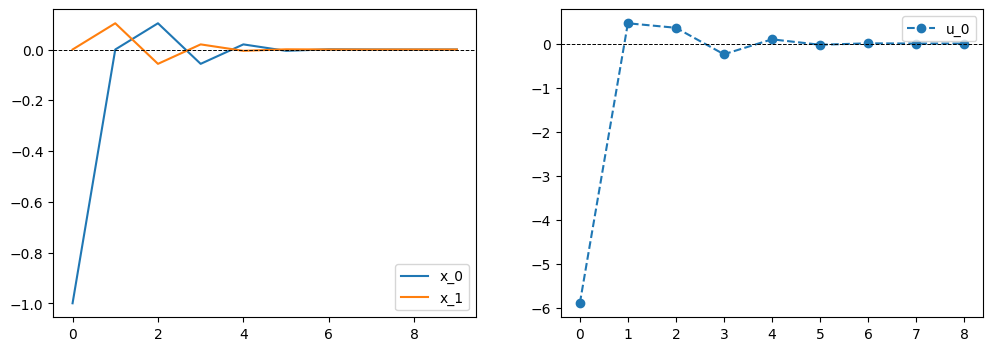

In [4]:
import matplotlib.pyplot as plt

X = np.array(X).reshape(N, 2)
U = np.array(U).reshape(N-1, 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for k in range(2):
    plt.plot(np.arange(0, N), X[:, k], label=f"x_{k}")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()

plt.subplot(1, 2, 2)
for k in range(1):
    plt.plot(np.arange(0, N-1), U[:, k], marker="o", linestyle="--", label=f"u_{k}")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()

plt.show()